In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.1,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.describe() #stats descriptions of the column

,R&D Spend,Administration,Profit
count,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,112012.639200
std,45902.256482,28017.802755,40306.180338
min,0.000000,51283.140000,14681.400000
25%,39936.370000,103730.875000,90138.902500
50%,73051.080000,122699.795000,107978.190000
75%,101602.800000,144842.180000,139765.977500
max,165349.200000,182645.560000,192261.830000


In [8]:
df.isna().any() #displays any missing values in columns

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [9]:
df['State'].unique() #uniques of this column

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
df['State'].value_counts() #list of unique values with numbers

New York      17
California    17
Florida       16
Name: State, dtype: int64

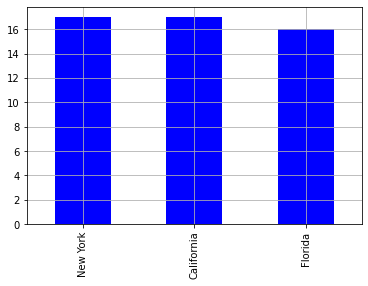

In [11]:
df['State'].value_counts().plot(kind='bar',color='blue')
plt.grid()

In [12]:
df.corr() # correaltion between numeric columns

,R&D Spend,Administration,Profit
R&D Spend,1.000000,0.241955,0.972900
Administration,0.241955,1.000000,0.200717
Profit,0.972900,0.200717,1.000000


# Correlation Concept

When two sets of data are strongly linked together we say they have a High Correlation.
The word Correlation is made of Co- (meaning "together"), and Relation

    Correlation is Positive when the values increase together, and
    Correlation is Negative when one value decreases as the other increases
    
Correlation ranges between [+1 and -1]
Perfect positive correlation will have value +1 
Perfect negative correlation will have value -1
When there is not any impact of features to each other we say no correaltions which is Zero

Correlation is important when exploring the relation between data features. Because selecting correct feature for predictions is statistically important to predict with better performance.


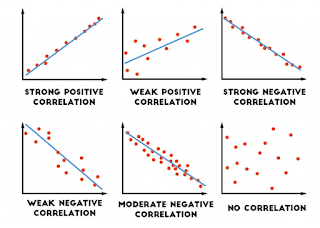



MAthematical equation for Correlation is:

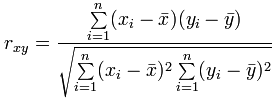

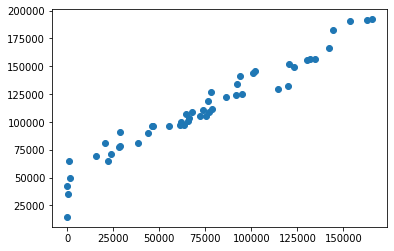

In [77]:
plt.scatter(df['R&D Spend'],df['Profit'])  # high correlation between R & D and Profit

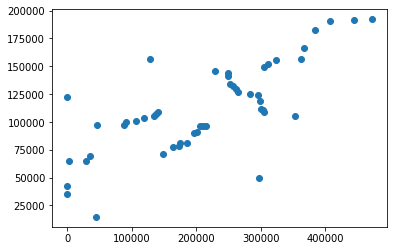

In [78]:
plt.scatter(df['Marketing Spend'],df['Profit']) 

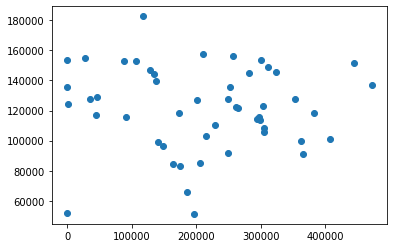

In [79]:
plt.scatter(df['Marketing Spend'],df['Administration'])  # almost no correlation 

# More plausible correlation heatmap matrix

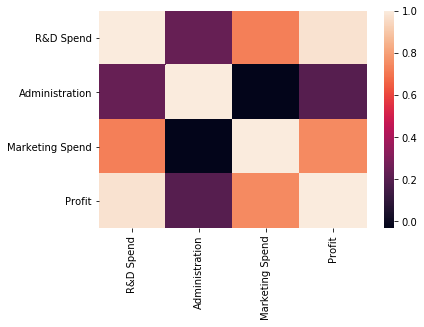

In [80]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)       # the brighter the color the higher correlation is

#### looking for the NAN values, if there exists Not A number its worth to get rid of them, in most cases raw data
comes in noisy format including with NAN values

In [81]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [82]:
# imputing NAN values manually

df['Administration'][4:6]=np.NAN

C:\Users\kduisheev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
df.isnull().any() 

R&D Spend          False
Administration      True
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [84]:
df.isnull().sum() #there are two nan values in Administration feature

R&D Spend          0
Administration     2
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [85]:
df[df['Administration'].isnull()] #Extracting Nan value locations

,R&D Spend,Administration,Marketing Spend,State,Profit
4,142107.34,NaN,366168.42,Florida,166187.94
5,131876.90,NaN,362861.36,New York,156991.12


In statistics there are various techniques to treat with NAN values inorder to make up your data,
each has different consequences, so they should be selected carefully:
                                                       
    1. Dropping NAN containing rows            
    2. Backward or Forward filling method       
    3. Filling with mean, median of the row     
    4. Replacing with zero

I would recommend you to read articles about #DATA Imputation methods

In [86]:
df=df.dropna()  #Dropping NAN rows, affected to shrink our data

In [90]:
#Use Fillna with mean or median of the feature
#USe Backward or Forward filling method 

In [91]:
df.shape

(48, 5)

In [92]:
# check for the NAN values
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [96]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
6,134615.46,147198.87,127716.82,California,156122.51


In [95]:
from sklearn.linear_model import LinearRegression


In [321]:
x=df.iloc[:,:3].values
y=df.iloc[:,4].values

In [322]:
x.shape

(48, 3)

Fitting the Data X with Y

In [329]:
regr = LinearRegression() # build multiple linear_predictor
regr.fit(x,y) # fit the data
y_pred = regr.predict(x) #predict data

REmember Line equation, for single independent var and multiple independent variables
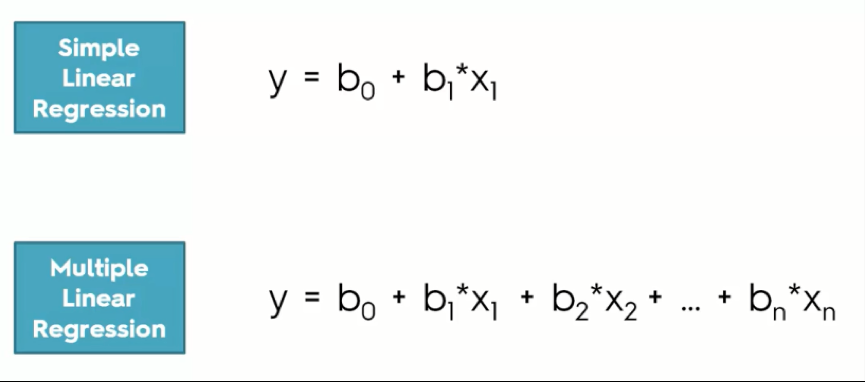

#### In our example we have multiple inputs with multiple prameters(coefficients B0-intersection  and B1,B2,B3.....)

In [324]:
regr.coef_   #Coefficients B1 etc...

array([ 0.81752387, -0.04176775,  0.02713059])

In [325]:
regr.intercept_   # intersection Y

51394.3346930444

Predicting new data
Assume:
    R&D=150000
    Administration=98000
    Marketing=198500
    
Predict=regr.intercept_+0.81752387 x R&D+(-0.04176775 x ADministration)+0.02713059 x Marketing

In [326]:
#convert assumed values and predict
x_new=np.array([150000,98000,198500])
x_new1=x_new.reshape(1,3)
x_new1

array([[150000,  98000, 198500]])

In [327]:
y_pred=regr.predict(x_new1)
y_pred

array([175315.09941939])

## Metrics in Regression


    Mean Absolute Error
    Mean Square Error
    Mean Absolute Percentage Error
    Mean Percentage Error
    R squared Error


In [330]:
#Let's apply two differnet metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(y, y_pred),'<<>><<>>',mean_squared_error(y, y_pred)/100000)

0.9486281714088522 <<>><<>> 796.7125384696615


## Error Interpretation
The larger the R squred error is the better.
The smaller the Mean squared error is the better

For more info read
https://www.dataquest.io/blog/understanding-regression-error-metrics/

## Improving Results

Ways of improving results

1. Scale the data
2. Punish the features
3. Reward the features

Scaling> helps to treat with data in a blanced way, If some features range from wide differences between min and max,ML gives unwanted weights for those values. So scaling keeps features to range between 0 and 1 as aresult feature values are normilized

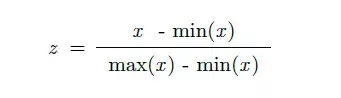



a=[1,2,4,5,4,1000,45000,54,-5660,123945]

#as you see , variable a has wide range of values. from 123945 to -5660

### for i in a:
    print((i-min(a))/(max(a)-min(a)))

[0.04367887041395008, 
0.04368658616565719, 
0.04370201766907141, 
0.04370973342077852, 
0.04370201766907141, 
0.05138690636935304, 
0.3908799814821959, 
0.04408780525442691, 
0.0,  
1.0]

After normalization our a contains much much normalized values

So, Sklearn has built in scaling functions, Let's benefit from them

In [331]:
from sklearn.preprocessing import MinMaxScaler

In [332]:
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)

In [333]:
x[:5]

array([[1.        , 0.65174393, 1.        ],
       [0.98335946, 0.76197173, 0.94089337],
       [0.92798459, 0.37957895, 0.8646636 ],
       [0.87313643, 0.51299839, 0.81223513],
       [0.81412828, 0.73016111, 0.27071031]])

In [335]:
# APplying for multiple regression
regr = LinearRegression() # build multiple linear_predictor
regr.fit(x,y) # fit the data
y_pred = regr.predict(x) #predict data
print(r2_score(y, y_pred),'<<>><<>>',mean_squared_error(y, y_pred)/100000)

0.9486281714088522 <<>><<>> 796.7125384696611


In [336]:
# Ridge and Lasso Penalty Punishments
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.5)
reg.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [337]:
reg.score(x,y)

0.9316357220802176

In [338]:
reg = linear_model.Lasso(alpha=0.0001)
reg.fit(x,y)
reg.score(x,y)

0.9486281714088518

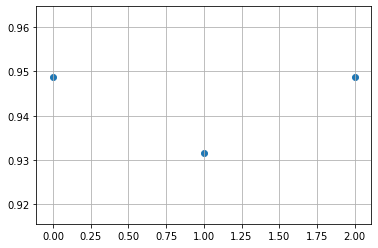

In [339]:
a=[0.9486281714088522,0.9316357220802176,0.9486281714088518]
plt.scatter(np.arange(3),a)

plt.grid()

## Conclusion
The winner seems: All applied improvement emthods had just minor differences in terms of errors
    Refer to the Lasso and Ridge regression penalty methods in details. 